In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Univariate Analysis on Numerical Column

#Age

conclusion:
1. Age is Almost normally Distributed
2. 19% of Data are missing
3. There are some outliers

In [4]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

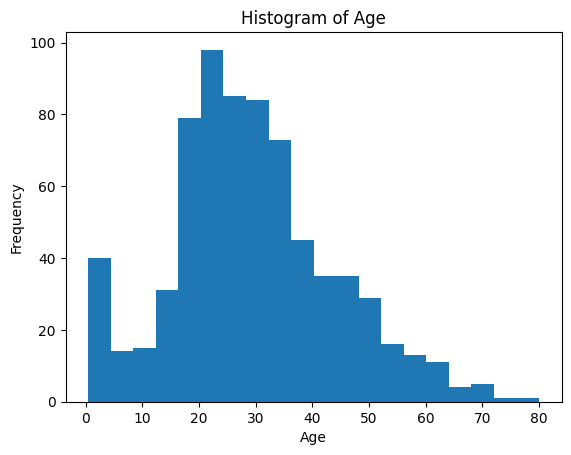

In [5]:
plt.hist(df['Age'],bins= 20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


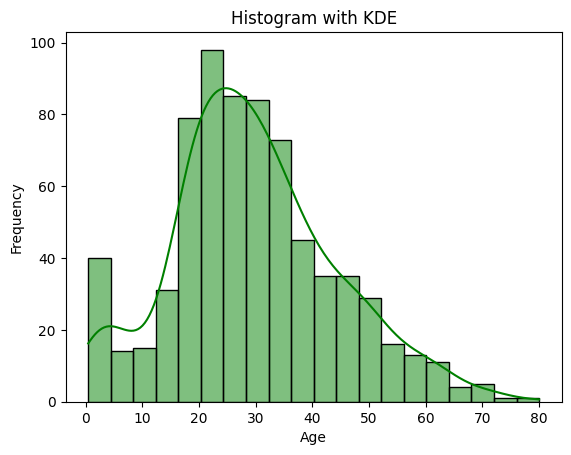

In [6]:
sns.histplot(df['Age'], kde=True,color = 'g')
plt.title('Histogram with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['Age'].skew() #if it ia alomost and nearly to zero then it is perfect normally distributed 

0.38910778230082704

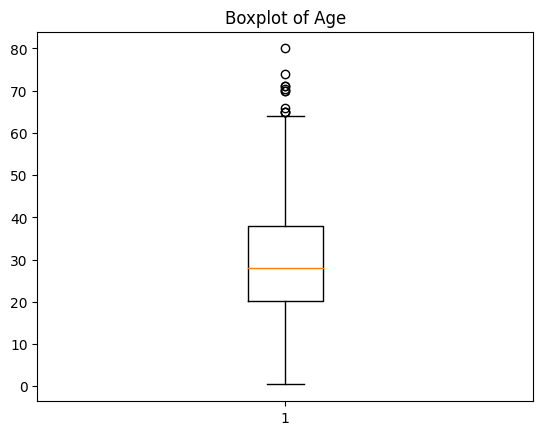

In [8]:

plt.boxplot(df['Age'].dropna())  # Drop NaN values if any
plt.title('Boxplot of Age')
plt.show()


In [9]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
df["Age"].isnull().sum()/len(df["Age"])


0.19865319865319866

#fare 

Conclusions 
1. Thew data is Highly positive Skewed
2. Fare column contain group fare not individual fare
3. we need to create the individual column called individual Fare

In [11]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

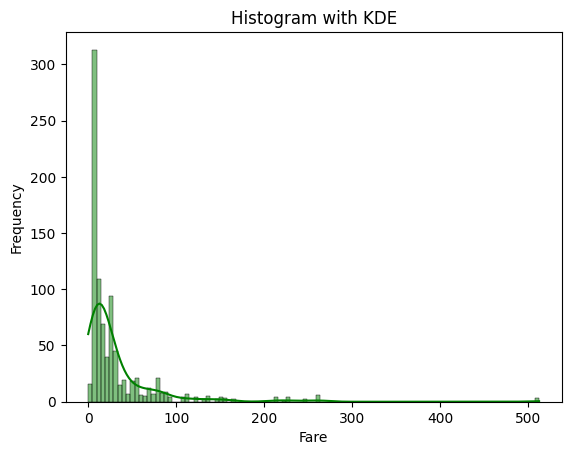

In [12]:
sns.histplot(df['Fare'], kde=True,color = 'g')
plt.title('Histogram with KDE')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [13]:
df['Fare'].skew() #Highly  positively Skewed

4.787316519674893

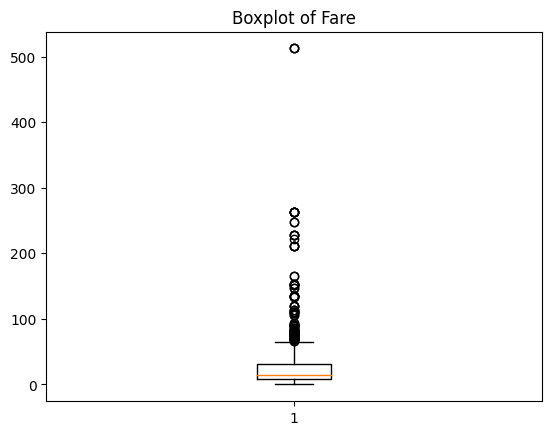

In [14]:

plt.boxplot(df['Fare'].dropna())  # Drop NaN values if any
plt.title('Boxplot of Fare')
plt.show()

In [15]:
df[df["Fare"] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [16]:
df["Fare"].isnull().sum() # No Missing Values

0

# univariate analysis on Categorical column 

#Survived

Conclusions:
1. There is no missing Values in Survived Column 
2. Survived passenger is 38%

In [17]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

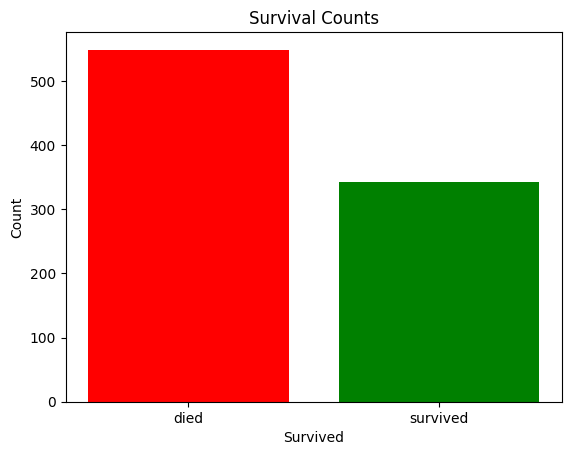

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Survived' is the column you want to plot
plt.bar(df['Survived'].value_counts().keys(), df['Survived'].value_counts(),color = ["r","g"] )

plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(df['Survived'].value_counts().keys(),labels =["died","survived"])
plt.show()


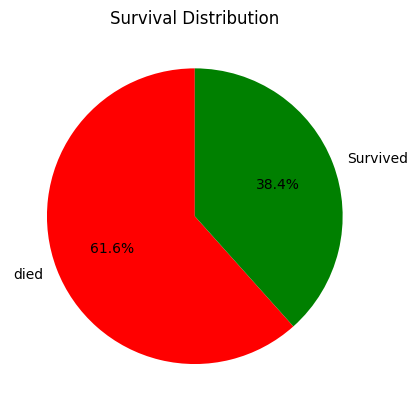

In [19]:
survived_counts = df['Survived'].value_counts()

# Create a pie chart
plt.pie(survived_counts, labels=["died","Survived"], autopct='%0.1f%%', startangle=90,colors = ["r","g"])

plt.title('Survival Distribution')
plt.show()


In [20]:
df["Survived"].isnull().sum() # There is no missing Values

0

##Pclass

**Conclusion**
1. surprisingly less people travelled in Pclass 2 and more in Pclass 1

In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
list(df["Pclass"].value_counts().keys())

[3, 1, 2]

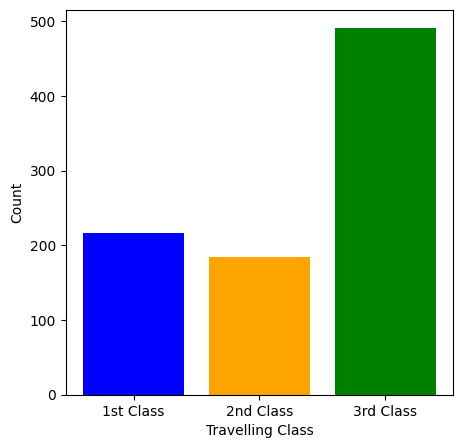

In [23]:
plt.figure(figsize =[5,5] )
plt.bar(list(df["Pclass"].value_counts().keys()),df['Pclass'].value_counts(),color = ["green","blue","orange"] )
plt.xlabel('Travelling Class')
plt.ylabel('Count')
plt.xticks(df['Pclass'].value_counts().keys(),labels =["3rd Class","1st Class","2nd Class"])
plt.show()

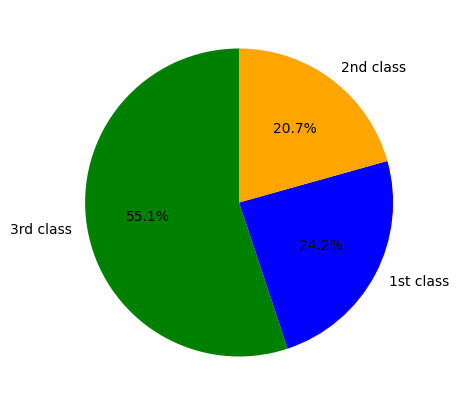

In [24]:

plt.figure(figsize=[5, 5])

plt.pie(list(df["Pclass"].value_counts()), labels=['3rd class','1st class', '2nd class'], autopct='%0.1f%%',startangle = 90,colors = ["green","blue","orange"])

plt.show()


In [25]:
df["Pclass"].isnull().sum() # there is no null value in Pclass

0

##Sex


Conclusion:
1. 64% Male and 35% Female

In [26]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
list(df["Sex"].value_counts().keys())

['male', 'female']

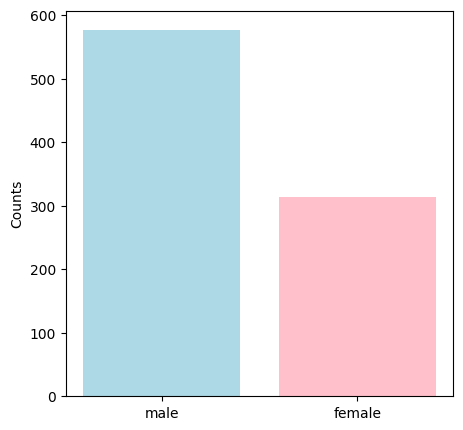

In [28]:

plt.figure(figsize=[5,5])
plt.bar(list(df["Sex"].value_counts().keys()),df["Sex"].value_counts(),color =["lightblue","pink"] )
plt.ylabel("Counts")
plt.show()

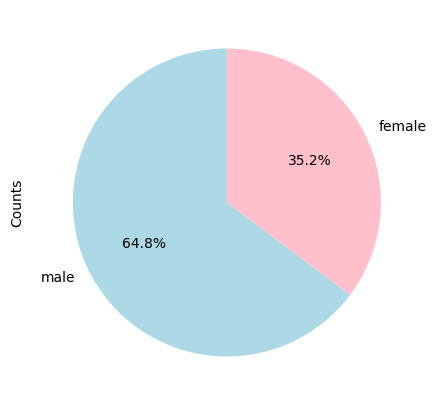

In [29]:
plt.figure(figsize=[5,5])
plt.pie(list(df["Sex"].value_counts()),labels =list(df["Sex"].value_counts().keys()), autopct='%0.1f%%',startangle = 90,colors =["lightblue","pink"] )
plt.ylabel("Counts")
plt.show()

In [30]:
df["Sex"].isnull().sum()

0

In [31]:
##SibSp


# Conclusion:
# 1.most of the people where travel solo i.e. 68%
# 2. rest with their Family

In [32]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
list(df["SibSp"].value_counts().keys())

[0, 1, 2, 4, 3, 8, 5]

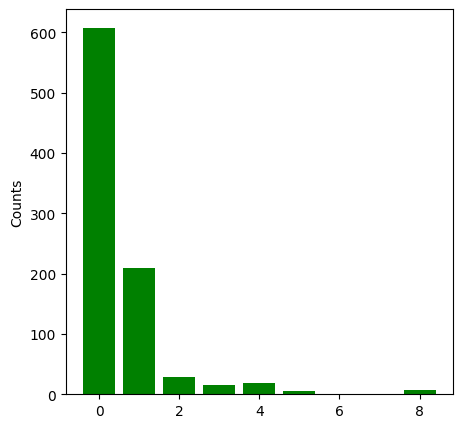

In [34]:

plt.figure(figsize=[5,5])
plt.bar(list(df["SibSp"].value_counts().keys()),df["SibSp"].value_counts(),color =["green"] )
plt.ylabel("Counts")
plt.show()

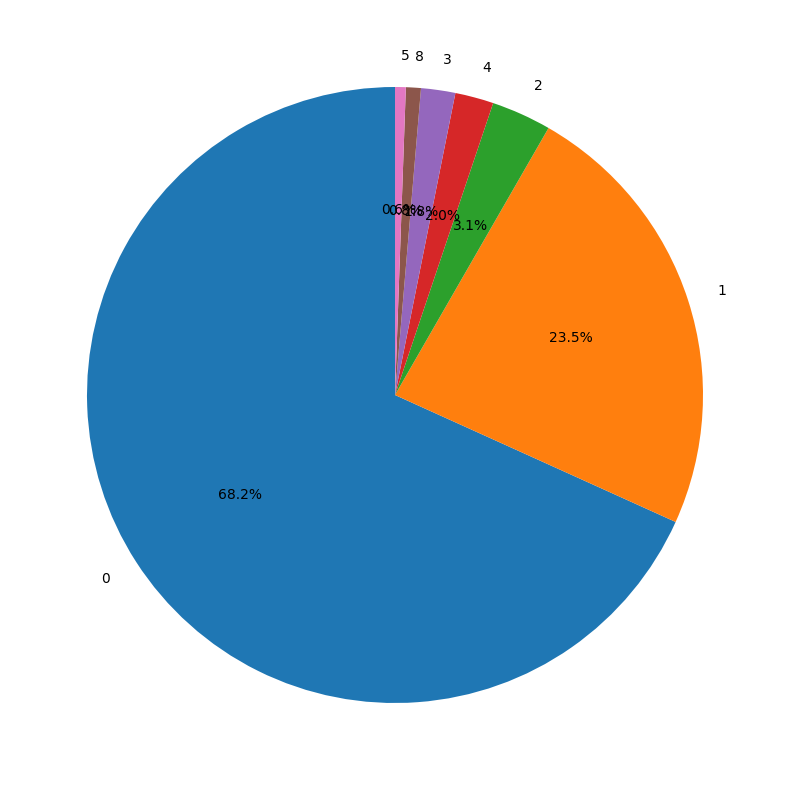

In [35]:
plt.figure(figsize=[10,10])
plt.pie(list(df["SibSp"].value_counts()),labels =list(df["SibSp"].value_counts().keys()), autopct='%0.1f%%',startangle = 90 )
plt.show()

In [36]:
df["SibSp"].isnull().sum()

0

In [37]:
# ##Parch


# Conclusion:
# 1. same most of the passenger where travel solo
# 2. parent child and spouse colum can be merge to form a new column called Family size
# 3. And also create one more column for who are travel alone

In [38]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
list(df["Parch"].value_counts().keys())

[0, 1, 2, 5, 3, 4, 6]

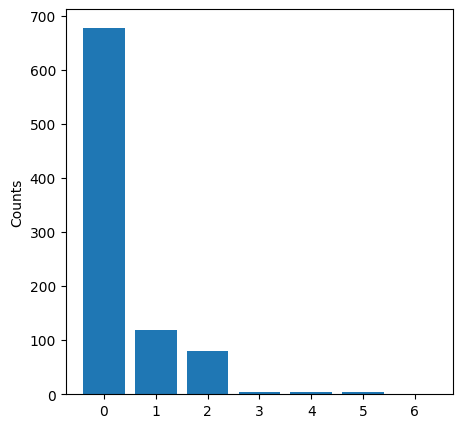

In [40]:

plt.figure(figsize=[5,5])
plt.bar(list(df["Parch"].value_counts().keys()),df["Parch"].value_counts() )
plt.ylabel("Counts")
plt.show()

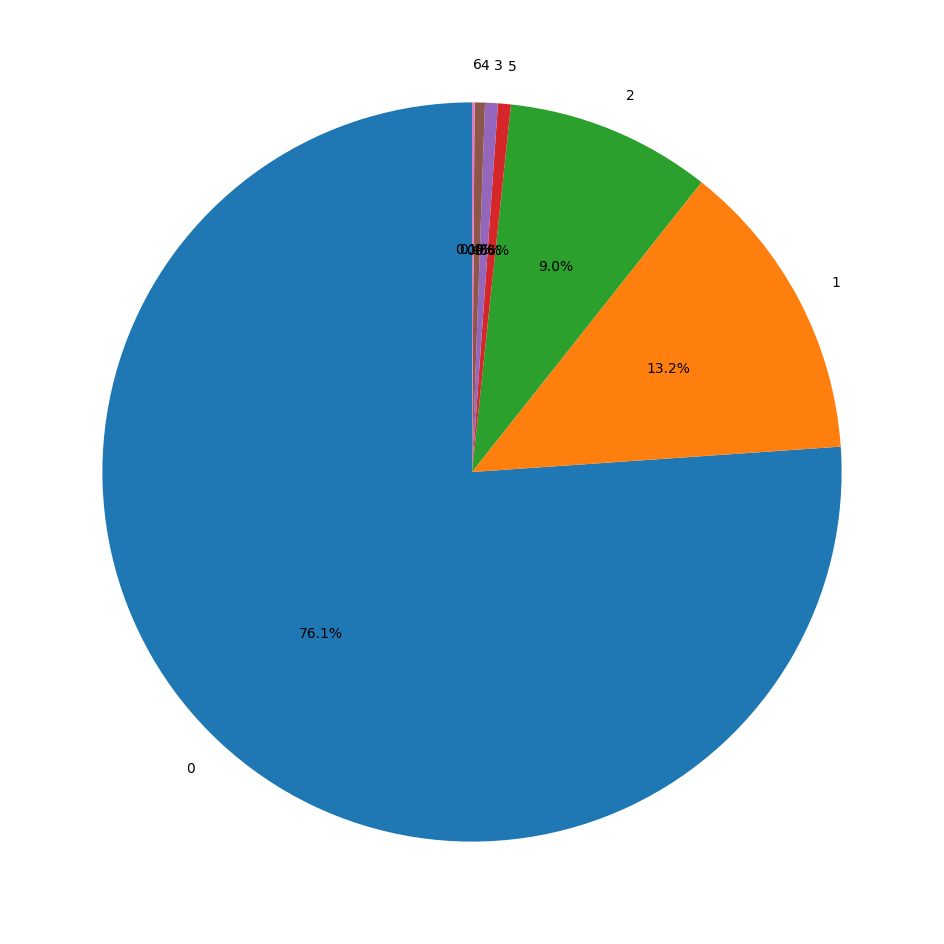

In [41]:
plt.figure(figsize=[12,12])
plt.pie(list(df["Parch"].value_counts()),labels =list(df["Parch"].value_counts().keys()), autopct='%0.1f%%',startangle = 90 )
plt.show()

In [42]:
df["Parch"].isnull().sum()

0

In [43]:
# ##Embarked


# Conclusion:
# 1.max traveller were take up from s i.e.  Southampton
# 2. there is 2 missing values

In [44]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
list(df["Embarked"].value_counts().keys())

['S', 'C', 'Q']

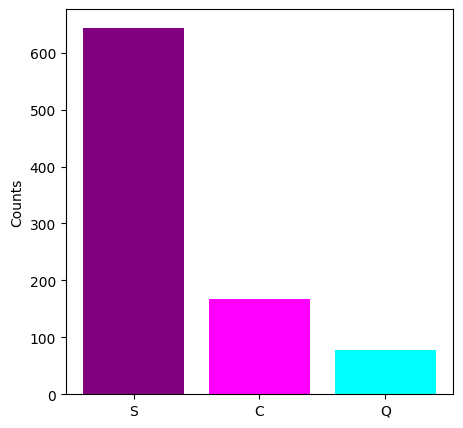

In [46]:

plt.figure(figsize=[5,5])
plt.bar(list(df["Embarked"].value_counts().keys()),df["Embarked"].value_counts(),color =["purple","magenta","cyan"] )
plt.ylabel("Counts")
plt.show()

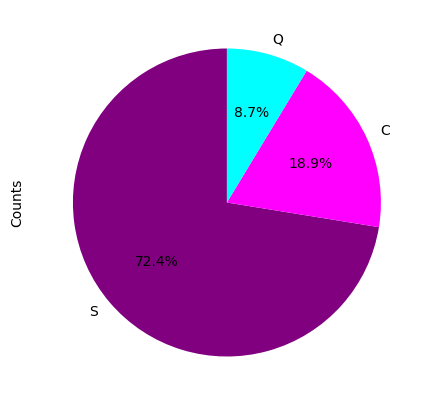

In [47]:
plt.figure(figsize=[5,5])
plt.pie(list(df["Embarked"].value_counts()),labels =list(df["Embarked"].value_counts().keys()), autopct='%0.1f%%',startangle = 90,colors =["purple","magenta","cyan"] )
plt.ylabel("Counts")
plt.show()

In [48]:
df["Embarked"].isnull().sum() #there are two missing Values

2

In [49]:
#mixed Column: Need to feature engineer the column to get more insight

# Bivariate Analysis

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# bivariate analysis should be perform on 2 column
# which should be 
# 1. numerical - numerical
# 2. numerical - categorical
# 3. categorical - categorical

In [52]:
# here we choose 2 column 
# 1. survived
# 2. Pclass

In [53]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [54]:
pd.crosstab(df['Survived'],df['Pclass'],normalize ='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [55]:
# conclusion:
# 1. In 3rd plclass about 75% were died and 24% survived(risky)
# 2. In 1st class around 63% were survived (Safe)

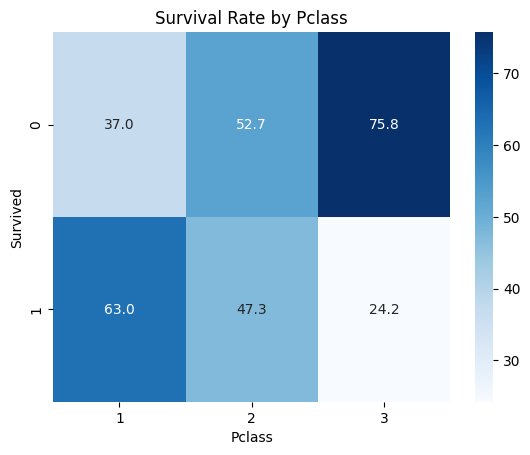

In [56]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize ='columns')*100,annot=True,cmap='Blues', fmt='.1f')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

In [57]:
pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


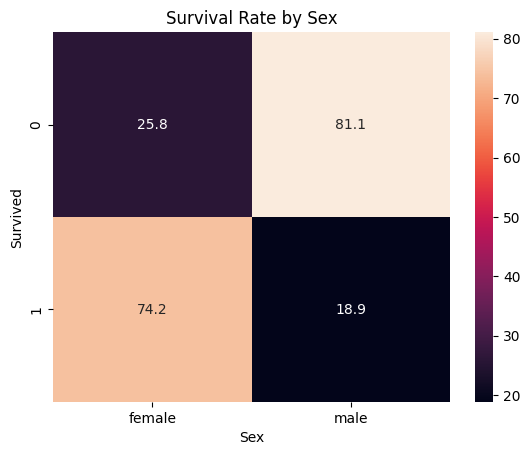

In [58]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize = 'columns')*100,annot =True,fmt='.1f')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

In [59]:
pd.crosstab(df['Survived'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


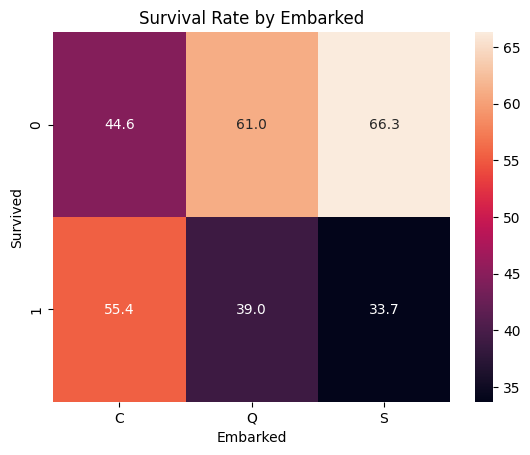

In [60]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize = 'columns')*100,annot =True,fmt='.1f')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

In [61]:
pd.crosstab(df['Sex'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [62]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize = 'columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


In [63]:
# Age VS Survived

In [64]:
df[df['Survived'] == 1]["Age"] # Survived

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [65]:
df[df['Survived'] == 0]["Age"] #Not Survived

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

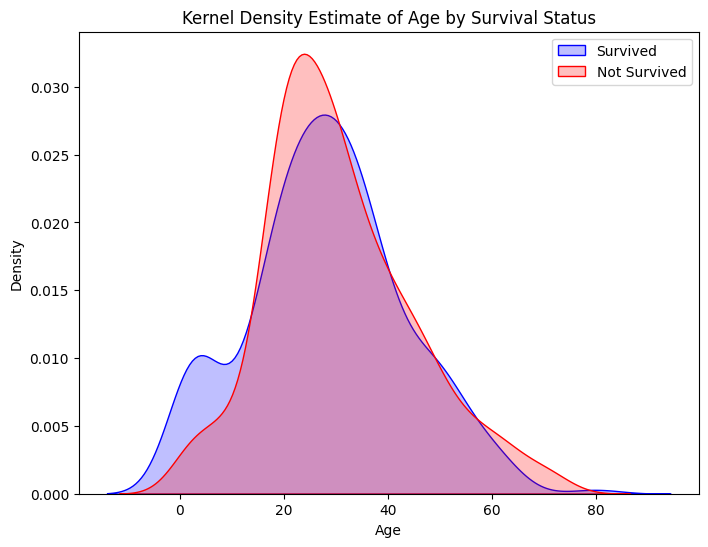

In [66]:
#create a graph for more visuals: 
    
    
survived_1_age = df[df['Survived'] == 1]["Age"]
survived_0_age = df[df['Survived'] == 0]["Age"]

# Plot KDEs
plt.figure(figsize=(8, 6))
sns.kdeplot(survived_1_age, label='Survived', shade=True, color='blue')
sns.kdeplot(survived_0_age, label='Not Survived', shade=True, color='red')

# Add labels and title
plt.title('Kernel Density Estimate of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [67]:
# conclusion:
# 1. here we can see that age group of 0 to 10 is survived means passenger give them a priority
# 2. after that up we can clearly see that survival is droped as the age is increasing

In [68]:
df[df['Pclass'] ==1]["Age"].mean()

38.233440860215055

In [69]:
#Feature Engineering on Fare column

In [70]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [71]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [72]:
#there is total 11 family member fore this ticket but 
#in this data set opnly shows 7

#here we find 1 member ticket costing i.e.


69.55/11 

6.322727272727272

In [73]:
df[df['Ticket'] == 'CA. 2343'] # only shows 7 member there is a problem in data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [74]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [75]:
#here is also showing 7 member we can fins through surname

In [76]:
#so here what i can do this i think 
#rest of the data may be in test data set

In [77]:
df1 = pd.read_csv("test.csv")

In [78]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [79]:
#here survived column is missing 

In [80]:
df=pd.concat([df,df1])

In [81]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [82]:
df[df["Ticket"]== 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [83]:
#here show 11 Family Member

In [84]:
df["Ticket"].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [85]:
df[df["Ticket"]== 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [86]:
df["Individual_Fair"]=df["Fare"]/(df["SibSp"]+df["Parch"] +1)

In [87]:
df["Individual_Fair"]

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: Individual_Fair, Length: 1309, dtype: float64

In [88]:
df["Individual_Fair"].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: Individual_Fair, dtype: float64

<AxesSubplot: >

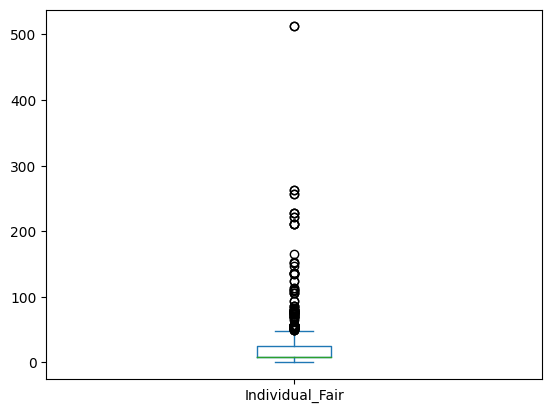

In [89]:
df["Individual_Fair"].plot(kind="box" ) #Shortcut of plots

In [90]:
#there is one person who is truely  paid 500 bugs prerviously  we think of wrong outlier

In [91]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [92]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fair,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1


In [93]:
#we can create one more column i.e Family type which is categorical column 

# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

In [94]:

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [95]:
df['family_type'] = df['family_size'].apply(transform_family_size)

In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fair,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [97]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [98]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fair,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


In [99]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual_Fair,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware


In [129]:
df['Title']=df['Name'].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [130]:
df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [131]:
titles_to_replace = ['Rev.', 'Dr.', 'Col.', 'Mlle.', 'Major.', 'Don.', 'Capt.', 'the', 'Jonkheer.', 'Dona.']
replacement_value = 'other'

df['Title'] = df['Title'].replace(titles_to_replace, replacement_value)


In [132]:
df['Title'].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       29
Ms.          2
Mme.         1
Lady.        1
Sir.         1
Name: Title, dtype: int64

In [133]:
titles_to_replace = ['Ms.','Mlle.',]
replacement_value = 'Miss.'


df['Title'] = df['Title'].replace(titles_to_replace,replacement_value)


In [134]:
df['Title'].value_counts()

Mr.        757
Miss.      262
Mrs.       197
Master.     61
other       29
Mme.         1
Lady.        1
Sir.         1
Name: Title, dtype: int64

In [135]:
titles_to_replace = ['Mme.','Lady.',]
replacement_value = 'Mrs.'


df['Title'] = df['Title'].replace(titles_to_replace,replacement_value)

In [136]:
df['Title'].value_counts()

Mr.        757
Miss.      262
Mrs.       199
Master.     61
other       29
Sir.         1
Name: Title, dtype: int64

In [137]:
df['Title'] = df['Title'].replace('Sir.','Mr.')

In [138]:
df['Title'].value_counts()

Mr.        758
Miss.      262
Mrs.       199
Master.     61
other       29
Name: Title, dtype: int64

In [147]:
pd.crosstab(df['Survived'],df['Title'],normalize = 'columns' )*100

Title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,30.054645,84.169884,20.472441,65.217391
1.0,57.5,69.945355,15.830116,79.527559,34.782609


In [ ]:
# for multivarient analysis we find correlation with all the columns 

In [148]:
df.corr()

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_4524\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_Fair,family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
Individual_Fair,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


In [149]:
df.corr()['Survived']

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_4524\2226390551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived']


PassengerId       -0.005007
Survived           1.000000
Pclass            -0.338481
Age               -0.077221
SibSp             -0.035322
Parch              0.081629
Fare               0.257307
Individual_Fair    0.221600
family_size        0.016639
Name: Survived, dtype: float64

In [ ]:
df.corr()

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_4524\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


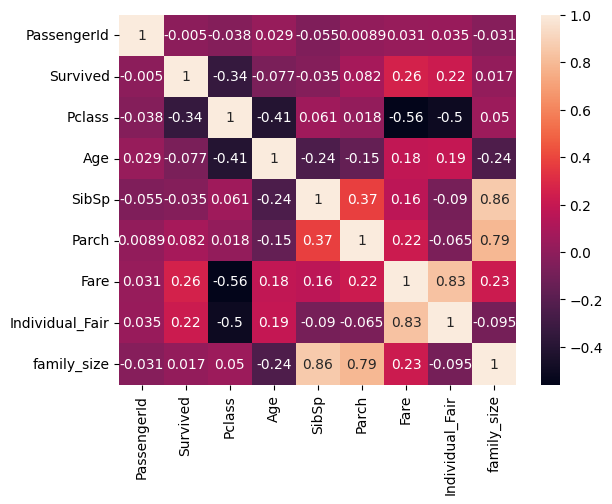

In [151]:
sns.heatmap(df.corr(),annot=True)
plt.show()

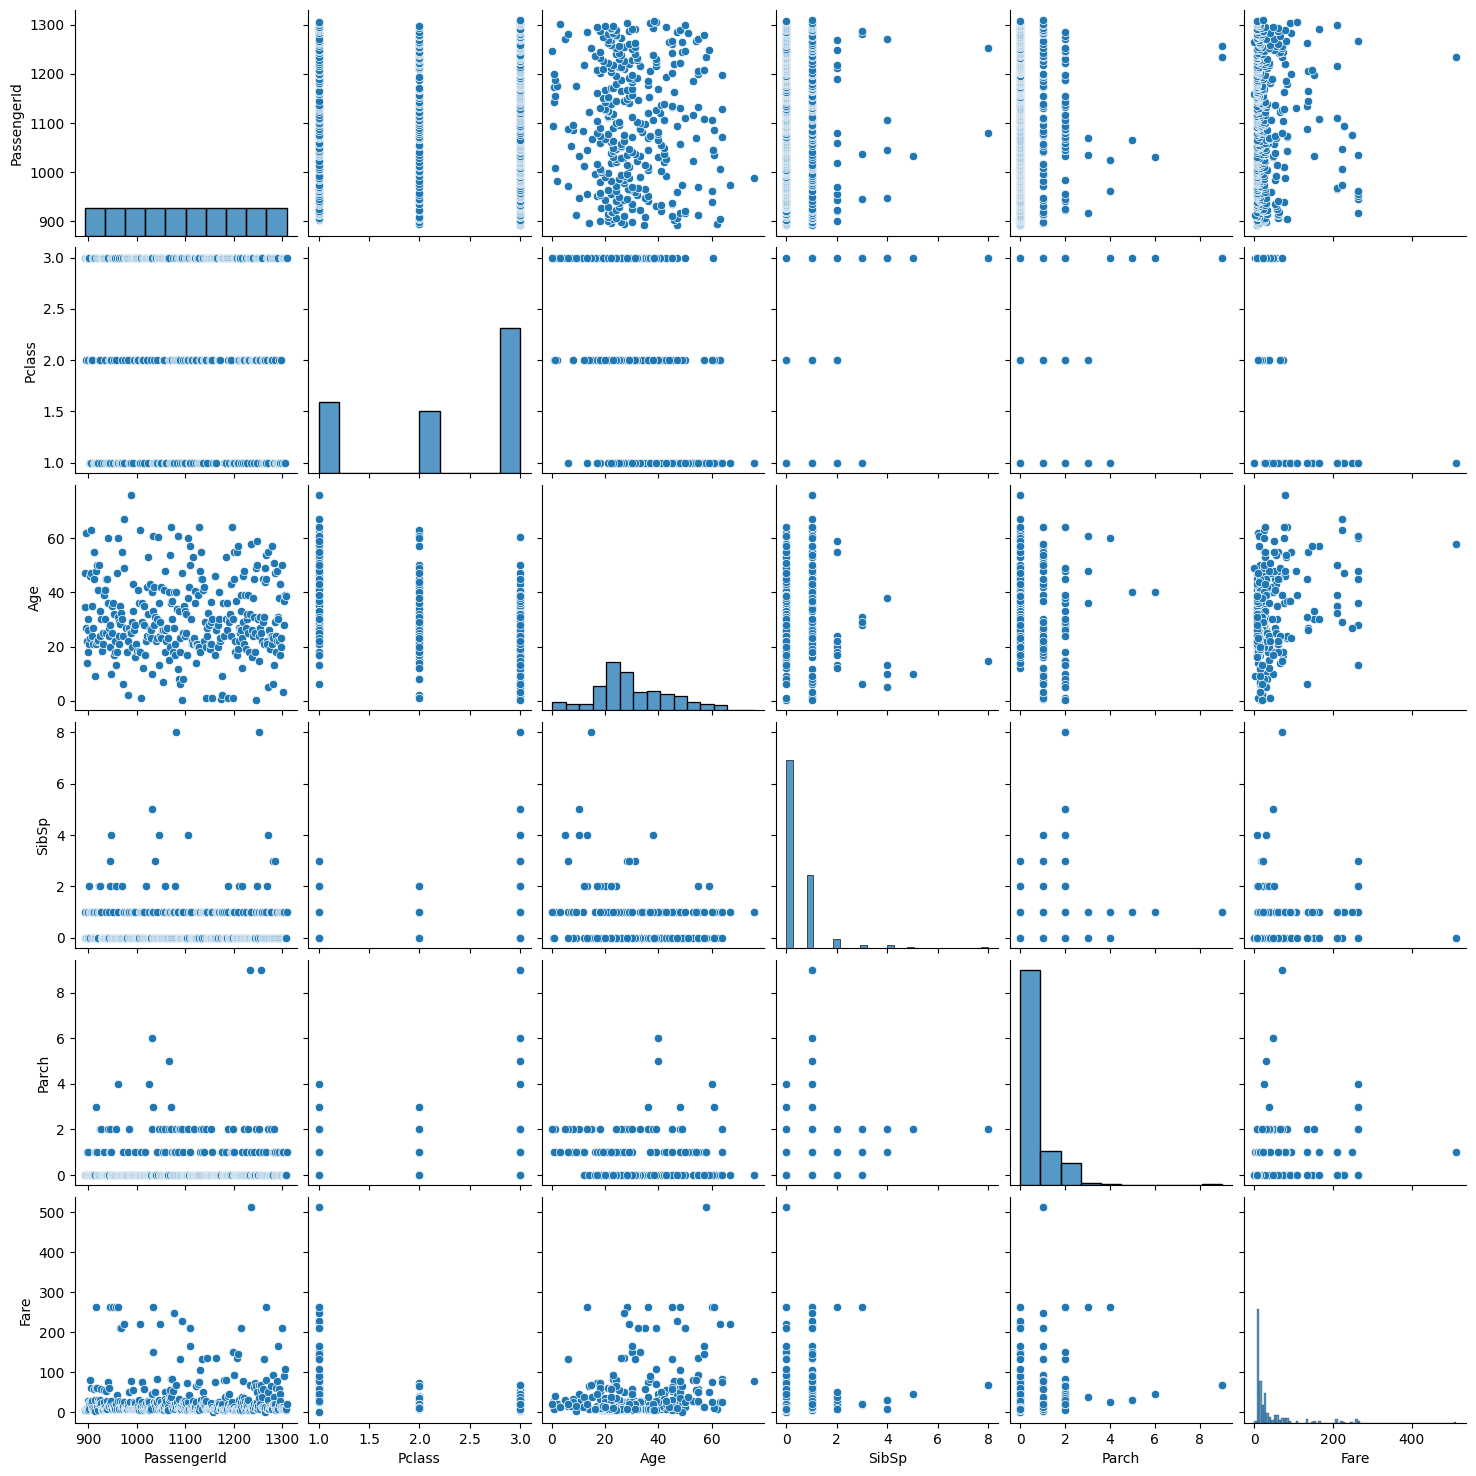

In [152]:
sns.pairplot(df1)